In [37]:
import sys
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


In [38]:
import numpy as np
import matplotlib.pyplot as plt


def visualize_classifier(classifier, X, y, title=''):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure()

    # Specify the title
    plt.title(title)

    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))

    plt.show()

In [39]:
# Load input data
input_file = '../aiwp-data/data_imbalance.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]


In [47]:
# Separate input data into two classes based on labels
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])
class_0.shape, class_1.shape

((250, 2), (1250, 2))

/tmp/ipykernel_6417/2298839656.py:3: UserWarning: You passed a edgecolor/edgecolors ('green') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black',


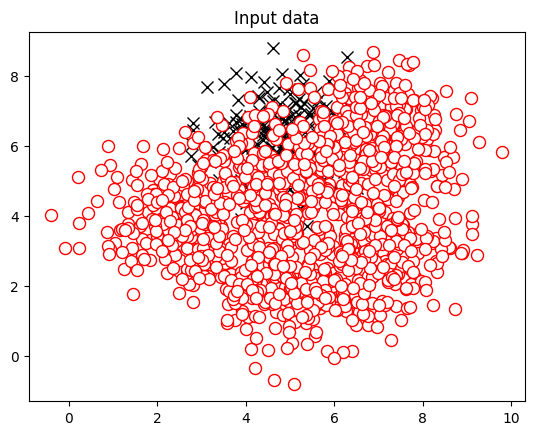

In [41]:
# Visualize input data
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black', 
                edgecolors='green', linewidth=1, marker='x')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', 
                edgecolors='red', linewidth=1, marker='o')
plt.title('Input data')

# Split data into training and testing datasets 
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=5)

In [42]:
# if len(sys.argv) > 1:
#     if sys.argv[1] == 'balance':
#         params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0, 'class_weight': 'balanced'}
#     else:
#         raise TypeError("Invalid input argument; should be 'balance'")

In [43]:
# class_weight': 'balanced'
params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0, 'class_weight': 'balanced'}

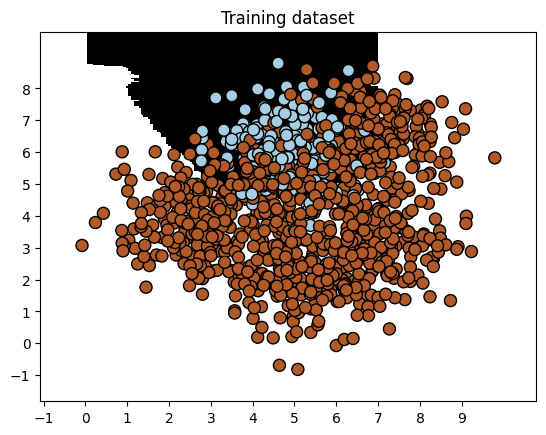

In [44]:
# # Extremely Random Forests classifier
# params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}
# if len(sys.argv) > 1:
#     if sys.argv[1] == 'balance':
#         params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0, 'class_weight': 'balanced'}
#     else:
#         raise TypeError("Invalid input argument; should be 'balance'")

classifier = ExtraTreesClassifier(**params)
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

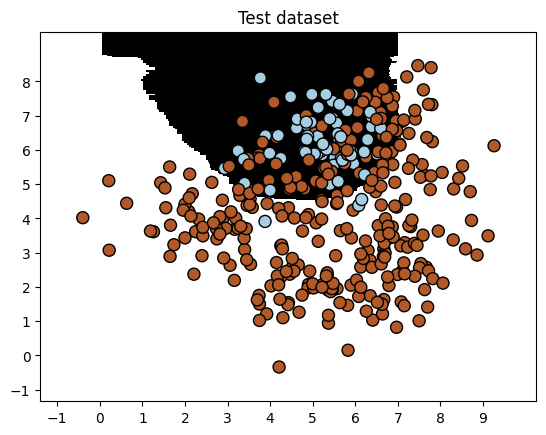

In [45]:
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

In [46]:
# Evaluate classifier performance
class_names = ['Class-0', 'Class-1']
print("\n" + "#"*40)
print("Classifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
print("#"*40 + "\n")
print("Classifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))


########################################
Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.44      0.93      0.60       181
     Class-1       0.98      0.77      0.86       944

    accuracy                           0.80      1125
   macro avg       0.71      0.85      0.73      1125
weighted avg       0.89      0.80      0.82      1125

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.45      0.94      0.61        69
     Class-1       0.98      0.74      0.84       306

    accuracy                           0.78       375
   macro avg       0.72      0.84      0.73       375
weighted avg       0.88      0.78      0.80       375

